In [1]:
import numpy as np
import math
import pandas as pd
from root_pandas import read_root, to_root
from matplotlib import pylab as plt
import uproot
from scipy import stats
import argparse
import gc
from memory_profiler import profile

Welcome to JupyROOT 6.22/02


In [2]:
font = {'family': 'sanserif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

SMALL_SIZE = 18
MEDIUM_SIZE = 21
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
# @profile

def KDEgen(f_input):
    field_size="10x10"
    PBS_ID=999
    n_file=999
    filename=f_input
    print(f"input file: {filename}")
    ur=uproot.pandas.iterate(filename, "PhaseSpace", ['X','Y','dX','dY','Ekine'])
    mylist=list(ur)        
    df=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)

    print("read files")

    nparr=df.to_numpy()

    del ur
    del mylist
    # del dftot

    gc.collect()

    values=nparr.T

    bandwidth=0.025

    kde = stats.gaussian_kde(values,bw_method=bandwidth)
    print("generated KDE")

    del nparr
    del values

    gc.collect()

    events_to_be_generated=10000000   #1000000

    newsample = stats.gaussian_kde.resample(kde,events_to_be_generated)
    print("resampled KDE")
    del kde
    gc.collect()

    newsample=newsample.T
    newdf=pd.DataFrame(newsample,columns=['X','Y','dX','dY','Ekine'])
    del newsample
    gc.collect()
    newdf=newdf.astype('float32')

    newdf=newdf[(newdf['Ekine']>0)]
    newdf=newdf.astype('float32')

    newdf['dZ']=-1*pow(1.0-newdf['dX']*newdf['dX']-newdf['dY']*newdf['dY'],0.5)
    newdf=newdf.astype('float32')
    newdf=newdf[(newdf['dZ']<0)]

    newdf["Z"]=-0.0000005
    newdf=newdf.dropna(axis='index')
    newdf=newdf.astype('float32')
    
    ur=uproot.pandas.iterate(filename, "PhaseSpace", ['X','Y','dX','dY','dZ','Ekine'])
    mylist=list(ur)        
    df=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    del ur
    del mylist
    print("Finished")
    return newdf, df



In [33]:
newdf,df=KDEgen("/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Gamma_v3_highEn/Skimmed_output_1.root")

input file: /work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Gamma_v3_highEn/Skimmed_output_1.root
read files
generated KDE
resampled KDE
Finished


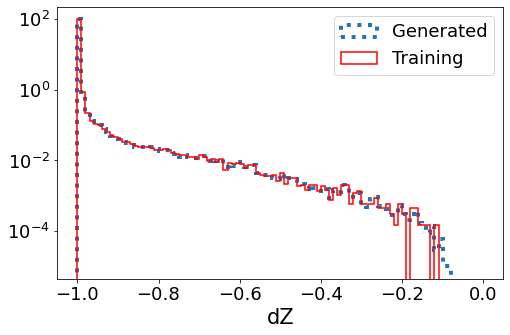

In [36]:
# fig=plt.figure(figsize=(8,5))
# fig.subplots_adjust(hspace=0.4)
# # fig.subplots_adjust(vspace=0.1)
# y1,x1,_=plt.hist(newdf['X'],bins=160,histtype='step',density=True,range=(-160,160),linewidth=4,linestyle="dotted",label="Generated")
# y2,x2,_=plt.hist(df['X'],bins=160,histtype='step',color='red',density=True,linewidth=1.5,linestyle="solid",range=(-160,160),label="Training")
# plt.xlabel('X (cm)')
# plt.legend(loc='upper right')
# fig.savefig('KDE_Gamma_X.png')


# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['Y'],bins=160,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-160,160),label="Generated")
# plt.hist(df['Y'],bins=160,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-160,160),label="Training")
# plt.xlabel('Y (cm)')
# plt.legend(loc='upper right')
# fig.savefig('KDE_Gamma_Y.png')

# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['Ekine'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(0,6.5),label="Generated")
# plt.hist(df['Ekine'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(0,6.5),label="Training")
# plt.xlabel('Kinetic Energy (MeV)')
# plt.legend(loc='upper right')
# # plt.yscale('log')
# fig.savefig('KDE_Gamma_Ekine.png')

# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['dX'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1.0,1.0),label="Generated")
# plt.hist(df['dX'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1.0,1.0),label="Training")
# plt.xlabel('dX')
# plt.legend(loc='upper right')
# fig.savefig('KDE_Gamma_dX.png')

# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['dY'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1.0,1.0),label="Generated")
# plt.hist(df['dY'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1.0,1.0),label="Training")
# plt.xlabel('dY')
# plt.legend(loc='upper right')
# fig.savefig('KDE_Gamma_dY.png')

fig=plt.figure(figsize=(8,5))
plt.hist(newdf['dZ'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1,0),label="Generated")
plt.hist(df['dZ'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1,0),label="Training")
plt.xlabel('dZ')
plt.legend(loc='upper right')
plt.yscale('log')
fig.savefig('KDE_Gamma_dZ.png')

(-40.0, 40.0)

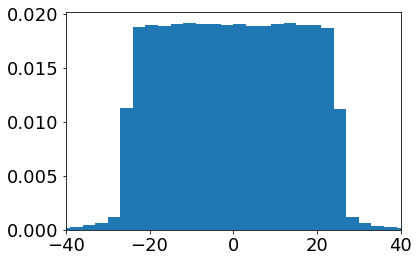

In [16]:
plt.hist(x1[:-1],bins=x1,weights=y1)
plt.xlim(-40,40)

In [37]:
newdf,df=KDEgen("/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Elec_v3_highEn/Skimmed_output_*.root")

input file: /work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Elec_v3_highEn/Skimmed_output_*.root
read files
generated KDE
resampled KDE
Finished


<Figure size 576x360 with 0 Axes>

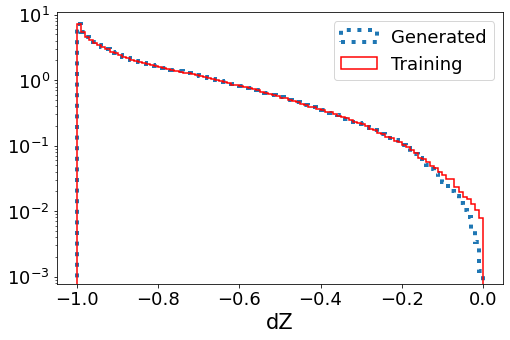

In [38]:
fig=plt.figure(figsize=(8,5))
fig.subplots_adjust(hspace=0.4)
# # fig.subplots_adjust(vspace=0.1)
# y1,x1,_=plt.hist(newdf['X'],bins=160,histtype='step',density=True,range=(-160,160),linewidth=4,linestyle="dotted",label="Generated")
# y2,x2,_=plt.hist(df['X'],bins=160,histtype='step',color='red',density=True,linewidth=1.5,linestyle="solid",range=(-160,160),label="Training")
# plt.xlabel('X (cm)')
# plt.legend(loc='upper right')
# fig.savefig('KDE_ElecPS1PS2_X.png')


# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['Y'],bins=160,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-160,160),label="Generated")
# plt.hist(df['Y'],bins=160,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-160,160),label="Training")
# plt.xlabel('Y (cm)')
# plt.legend(loc='upper right')
# fig.savefig('KDE_ElecPS1PS2_Y.png')

# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['Ekine'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(0,6.5),label="Generated")
# plt.hist(df['Ekine'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(0,6.5),label="Training")
# plt.xlabel('Kinetic Energy (MeV)')
# plt.legend(loc='upper right')
# fig.savefig('KDE_ElecPS1PS2_Ekine.png')

# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['dX'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1.0,1.0),label="Generated")
# plt.hist(df['dX'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1.0,1.0),label="Training")
# plt.xlabel('dX')
# plt.legend(loc='upper right')
# fig.savefig('KDE_ElecPS1PS2_dX.png')

# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['dY'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1.0,1.0),label="Generated")
# plt.hist(df['dY'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1.0,1.0),label="Training")
# plt.xlabel('dY')
# plt.legend(loc='upper right')
# fig.savefig('KDE_ElecPS1PS2_dY.png')

fig=plt.figure(figsize=(8,5))
plt.hist(newdf['dZ'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1,0),label="Generated")
plt.hist(df['dZ'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1,0),label="Training")
plt.xlabel('dZ')
plt.legend(loc='upper right')
plt.yscale('log')

fig.savefig('KDE_ElecPS1PS2_dZ.png')

# fig=plt.figure(figsize=(7,5))
# # fig.subplots_adjust(hspace=0.4)
# # fig.subplots_adjust(vspace=0.1)
# y1,x1,_=plt.hist(newdf['X'],bins=100,histtype='step',density=True,range=(-140,140),linewidth=4,linestyle="dotted",label="Generated")
# y2,x2,_=plt.hist(df['X'],bins=100,histtype='step',color='red',density=True,linewidth=1.5,linestyle="solid",range=(-140,140),label="Training")

# plt.xlabel('X (cm)')
# fig.savefig('KDE_ElecPS1PS2_X.png')


# fig=plt.figure(figsize=(7,5))
# plt.hist(newdf['Y'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-70,70),label="Generated")
# plt.hist(df['Y'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-70,70),label="Training")
# plt.xlabel('Y (cm)')
# fig.savefig('KDE_ElecPS1PS2_Y.png')
# fig=plt.figure(figsize=(7,5))

# plt.hist(newdf['Ekine'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(0,6.5),label="Generated")
# plt.hist(df['Ekine'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(0,6.5),label="Training")
# plt.xlabel('Kinetic Energy (MeV)')
# fig.savefig('KDE_ElecPS1PS2_Ekine.png')
# fig=plt.figure(figsize=(7,5))

# plt.hist(newdf['dX'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1.0,1.0),label="Generated")
# plt.hist(df['dX'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1.0,1.0),label="Training")
# plt.xlabel('dX')
# fig.savefig('KDE_ElecPS1PS2_dX.png')
# fig=plt.figure(figsize=(7,5))

# plt.hist(newdf['dY'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1.0,1.0),label="Generated")
# plt.hist(df['dY'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1.0,1.0),label="Training")
# plt.xlabel('dY')
# fig.savefig('KDE_ElecPS1PS2_dY.png')
# fig=plt.figure(figsize=(7,5))


# plt.hist(newdf['dZ'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1,-0.1),label="Generated")
# plt.hist(df['dZ'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1,-0.1),label="Training")
# plt.xlabel('dZ')
# fig.savefig('KDE_ElecPS1PS2_dZ.png')

In [39]:
newdf,df=KDEgen("/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_ElecFromPhS1_highEn/Skimmed_output_*.root")

input file: /work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_ElecFromPhS1_highEn/Skimmed_output_*.root
read files
generated KDE
resampled KDE
Finished


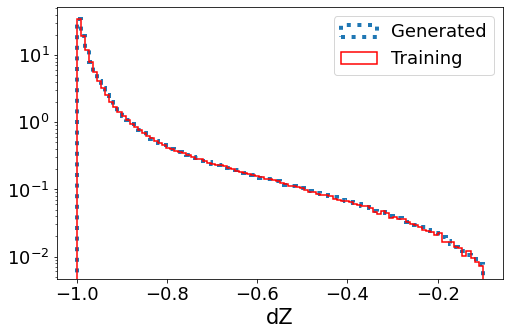

In [40]:
# fig=plt.figure(figsize=(8,5))
# fig.subplots_adjust(hspace=0.4)
# # fig.subplots_adjust(vspace=0.1)
# y1,x1,_=plt.hist(newdf['X'],bins=160,histtype='step',density=True,range=(-160,160),linewidth=4,linestyle="dotted",label="Generated")
# y2,x2,_=plt.hist(df['X'],bins=160,histtype='step',color='red',density=True,linewidth=1.5,linestyle="solid",range=(-160,160),label="Training")
# plt.xlabel('X (cm)')
# plt.legend(loc='upper right')
# fig.savefig('KDE_ElecPS2_X.png')


# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['Y'],bins=160,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-160,160),label="Generated")
# plt.hist(df['Y'],bins=160,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-160,160),label="Training")
# plt.xlabel('Y (cm)')
# plt.legend(loc='upper right')
# fig.savefig('KDE_ElecPS2_Y.png')

# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['Ekine'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(0,6.5),label="Generated")
# plt.hist(df['Ekine'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(0,6.5),label="Training")
# plt.xlabel('Kinetic Energy (MeV)')
# plt.legend(loc='upper right')
# fig.savefig('KDE_ElecPS2_Ekine.png')

# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['dX'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1.0,1.0),label="Generated")
# plt.hist(df['dX'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1.0,1.0),label="Training")
# plt.xlabel('dX')
# plt.legend(loc='upper right')
# fig.savefig('KDE_ElecPS2_dX.png')

# fig=plt.figure(figsize=(8,5))
# plt.hist(newdf['dY'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1.0,1.0),label="Generated")
# plt.hist(df['dY'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1.0,1.0),label="Training")
# plt.xlabel('dY')
# plt.legend(loc='upper right')
# fig.savefig('KDE_ElecPS2_dY.png')

fig=plt.figure(figsize=(8,5))
plt.hist(newdf['dZ'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1,-0.1),label="Generated")
plt.hist(df['dZ'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1,-0.1),label="Training")
plt.xlabel('dZ')
plt.legend(loc='upper right')
plt.yscale('log')
fig.savefig('KDE_ElecPS2_dZ.png')

# fig=plt.figure(figsize=(7,5))
# # fig.subplots_adjust(hspace=0.4)
# # fig.subplots_adjust(vspace=0.1)
# y1,x1,_=plt.hist(newdf['X'],bins=100,histtype='step',density=True,range=(-140,140),linewidth=4,linestyle="dotted",label="Generated")
# y2,x2,_=plt.hist(df['X'],bins=100,histtype='step',color='red',density=True,linewidth=1.5,linestyle="solid",range=(-140,140),label="Training")

# plt.xlabel('X (cm)')
# fig.savefig('KDE_ElecPS2_X.png')


# fig=plt.figure(figsize=(7,5))
# plt.hist(newdf['Y'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-70,70),label="Generated")
# plt.hist(df['Y'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-70,70),label="Training")
# plt.xlabel('Y (cm)')
# fig.savefig('KDE_ElecPS2_Y.png')
# fig=plt.figure(figsize=(7,5))

# plt.hist(newdf['Ekine'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(0,6.5),label="Generated")
# plt.hist(df['Ekine'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(0,6.5),label="Training")
# plt.xlabel('Kinetic Energy (MeV)')
# fig.savefig('KDE_ElecPS2_Ekine.png')
# fig=plt.figure(figsize=(7,5))

# plt.hist(newdf['dX'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1.0,1.0),label="Generated")
# plt.hist(df['dX'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1.0,1.0),label="Training")
# plt.xlabel('dX')
# fig.savefig('KDE_ElecPS2_dX.png')
# fig=plt.figure(figsize=(7,5))

# plt.hist(newdf['dY'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1.0,1.0),label="Generated")
# plt.hist(df['dY'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1.0,1.0),label="Training")
# plt.xlabel('dY')
# fig.savefig('KDE_ElecPS2_dY.png')
# fig=plt.figure(figsize=(7,5))


# plt.hist(newdf['dZ'],bins=100,histtype='step',linewidth=4,linestyle="dotted",density=True,range=(-1,-0.1),label="Generated")
# plt.hist(df['dZ'],bins=100,histtype='step',color='red',linewidth=1.5,linestyle="solid",density=True,range=(-1,-0.1),label="Training")
# plt.xlabel('dZ')
# fig.savefig('KDE_ElecPS2_dZ.png')

In [10]:
# fig,ax=plt.subplots(1,1,figsize=(8,8))
# plt.hist(x1[:-1],bins=x1,weights=y1,linewidth=4,linestyle="dotted",histtype='step',label="Generated")
# plt.hist(x2[:-1],bins=x2,weights=y2,linewidth=1.5,linestyle="solid",histtype='step',color='red',density=True,range=(-140,140),label="Training")
# plt.xlabel('X (cm)')
# plt.legend(loc='lower center')
# plt.show()

# fig.savefig('KDE_ElecPS2_X.png')

In [11]:
# fig,ax=plt.subplots(2,3,figsize=(15,8))
# fig.subplots_adjust(hspace=0.3)
# _=ax[0,0].hist(newdf['X'],bins=100,histtype='step',density=True,range=(-40,40),label="Generated")
# _=ax[0,0].hist(df['X'],bins=100,histtype='step',color='red',density=True,range=(-40,40),label="Training")
# _=ax[0,1].hist(newdf['Y'],bins=100,histtype='step',density=True,range=(-40,40),label="Generated")
# _=ax[0,1].hist(df['Y'],bins=100,histtype='step',color='red',density=True,range=(-40,40),label="Training")
# _=ax[0,2].hist(newdf['Ekine'],bins=100,histtype='step',density=True,label="Generated")
# _=ax[0,2].hist(df['Ekine'],bins=100,histtype='step',color='red',density=True,label="Training")
# _=ax[1,0].hist(newdf['dX'],bins=100,histtype='step',density=True,range=(-0.2,0.2),label="Generated")
# _=ax[1,0].hist(df['dX'],bins=100,histtype='step',color='red',density=True,range=(-0.2,0.2),label="Training")
# _=ax[1,1].hist(newdf['dY'],bins=100,histtype='step',density=True,range=(-0.2,0.2),label="Generated")
# _=ax[1,1].hist(df['dY'],bins=100,histtype='step',color='red',density=True,range=(-0.2,0.2),label="Training")
# _=ax[1,2].hist(newdf['dZ'],bins=100,histtype='step',density=True,range=(-1,-0.99),label="Generated")
# _=ax[1,2].hist(df['dZ'],bins=100,histtype='step',color='red',density=True,range=(-1,-0.99),label="Training")

# # _=ax[0,0].hist(newdf['X'],bins=100,histtype='step',density=True,range=(-140,140))
# # _=ax[0,0].hist(df['X'],bins=100,histtype='step',color='red',density=True,range=(-140,140))
# # _=ax[0,1].hist(newdf['Y'],bins=100,histtype='step',density=True,range=(-70,70))
# # _=ax[0,1].hist(df['Y'],bins=100,histtype='step',color='red',density=True,range=(-70,70))
# # _=ax[0,2].hist(newdf['Ekine'],bins=100,histtype='step',density=True,range=(0,6.5))
# # _=ax[0,2].hist(df['Ekine'],bins=100,histtype='step',color='red',density=True,range=(0,6.5))
# # _=ax[1,0].hist(newdf['dX'],bins=100,histtype='step',density=True,range=(-1.0,1.0))
# # _=ax[1,0].hist(df['dX'],bins=100,histtype='step',color='red',density=True,range=(-1.0,1.0))
# # _=ax[1,1].hist(newdf['dY'],bins=100,histtype='step',density=True,range=(-1.0,1.0))
# # _=ax[1,1].hist(df['dY'],bins=100,histtype='step',color='red',density=True,range=(-1.0,1.0))
# # _=ax[1,2].hist(newdf['dZ'],bins=100,histtype='step',density=True,range=(-1,-0.1))
# # _=ax[1,2].hist(df['dZ'],bins=100,histtype='step',color='red',density=True,range=(-1,-0.1))

# ax[0,0].set_xlabel('X (cm)')
# ax[0,1].set_xlabel('Y (cm)')
# ax[0,2].set_xlabel('Kinetic Energy (MeV)')
# ax[1,0].set_xlabel('dX')
# ax[1,1].set_xlabel('dY')
# ax[1,2].set_xlabel('dZ')
# ax[1,2].legend(loc='upper right')
# fig.savefig('KDE_Gamma.png')